In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
db = pd.read_csv('clasificacion1/train.csv')
db_test = pd.read_csv('clasificacion1/test.csv')
db

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [11]:
X = db[['Inflight entertainment','Cleanliness']]
y = db['satisfaction']
X_prueba = db[['Inflight entertainment','Cleanliness']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
y_pred = knn.predict(X_prueba)

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, random_state=43)
clf = clf.fit(X_train,y_train)

In [5]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.66


In [6]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.7100400369571912


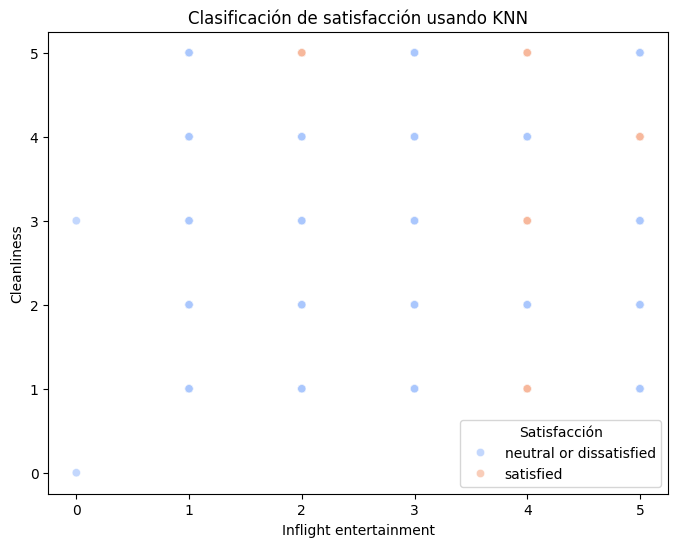

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un scatter plot de las predicciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred, palette="coolwarm", alpha=0.7)

# Etiquetas y título
plt.xlabel('Inflight entertainment')
plt.ylabel('Cleanliness')
plt.title('Clasificación de satisfacción usando KNN')
plt.legend(title="Satisfacción")
plt.show()

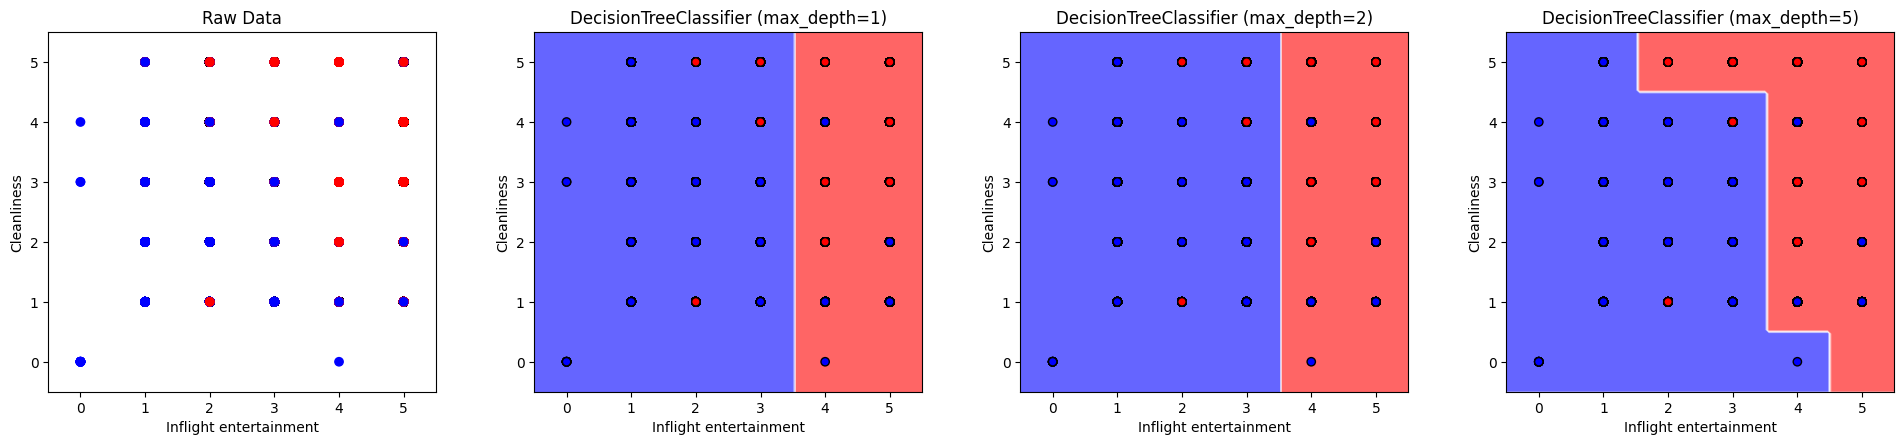

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Convertir DataFrame a arrays numpy
X_np = X.values
y_np = y.values

# Si la variable objetivo es categórica, convertirla a números
if y_np.dtype == 'object' or y_np.dtype == 'str':
    le = LabelEncoder()
    y_np = le.fit_transform(y_np)

def plot_classification(X, y, axs):
    min_val = np.amin(X, axis=0)
    max_val = np.amax(X, axis=0)

    diff = max_val - min_val
    min_val = min_val - 0.1 * diff
    max_val = max_val + 0.1 * diff

    axs[0].set_title('Raw Data')
    axs[0].set_xlabel('Inflight entertainment')
    axs[0].set_ylabel('Cleanliness')

    axs[0].set_xlim(min_val[0], max_val[0])
    axs[0].set_ylim(min_val[1], max_val[1])

    axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)

    for i, max_depth in enumerate([1, 2, 5]):
        axs[i+1].set_title(f'DecisionTreeClassifier (max_depth={max_depth})')
        axs[i+1].set_xlabel('Inflight entertainment')
        axs[i+1].set_ylabel('Cleanliness')

        axs[i+1].set_xlim(min_val[0], max_val[0])
        axs[i+1].set_ylim(min_val[1], max_val[1])

        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=43).fit(X, y)

        xx, yy = np.meshgrid(
            np.linspace(min_val[0], max_val[0], 100), 
            np.linspace(min_val[1], max_val[1], 100)
        )
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axs[i+1].contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.7, antialiased=True)
        axs[i+1].scatter(X[:, 0], X[:, 1], c=y, edgecolor='black', cmap=plt.cm.bwr)

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.tight_layout(pad=4.0)

plot_classification(X_np, y_np, axs)
plt.show()